# Importing Librairies

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

######

#########

import matplotlib.pyplot as plt

%matplotlib inline

# Defining Functions

In [2]:
def OneHotEncoder_label(data):
    label_encoder = LabelEncoder() #OrdinalEncoder() 
    data0 = data.copy()
    for i in data0.columns:
        #print(i, data0[i].dtype)
        if data0[i].dtype == "object":
            data0[i] = label_encoder.fit_transform(data0[i].astype(str)).astype('float64')
    return data0

In [3]:
def Downcast(df):
    '''Downcasts df columns to smaller columns types'''
    for col in df.columns:
        try:
            df[col]=pd.to_numeric(df[col],downcast='float')
            df[col]=pd.to_numeric(df[col],downcast='unsigned')
            print(col ,"has been downcasted to", df[col].dtypes)
        except:
            #If it doesn't downcast, aware the user
            print(col ,"has not been downcasted")
    return df

# Data Loading

In [4]:
# Data Animals+ Test + Genothidx(cows)
data = pd.read_csv("./data_animal_test_geno_train.csv")
data.head()

,Unnamed: 0,Unnamed: 0_x,HRD_ID,HRD_PRV_CD,ANM_ID,ENTER_HERD_DATE,COMPTR_NO,REGION,BIRTH_DATE_x,LEFT_HERD_DATE,...,HL,MSP,MT,DF,CA,DCA,BCS,MR,THURL_PLACE,MDR
0,0,39,4162,4,1882,2003-08-14,391.0,16,2003-08-14,2011-12-07,...,97.0,100.0,101.0,99.0,93.0,96.0,100.0,95.0,-2.0,97.0
1,1,39,4162,4,1882,2003-08-14,391.0,16,2003-08-14,2011-12-07,...,97.0,100.0,101.0,99.0,93.0,96.0,100.0,95.0,-2.0,97.0
2,2,39,4162,4,1882,2003-08-14,391.0,16,2003-08-14,2011-12-07,...,97.0,100.0,101.0,99.0,93.0,96.0,100.0,95.0,-2.0,97.0
3,3,39,4162,4,1882,2003-08-14,391.0,16,2003-08-14,2011-12-07,...,97.0,100.0,101.0,99.0,93.0,96.0,100.0,95.0,-2.0,97.0
4,4,39,4162,4,1882,2003-08-14,391.0,16,2003-08-14,2011-12-07,...,97.0,100.0,101.0,99.0,93.0,96.0,100.0,95.0,-2.0,97.0


# Data Exploration

In [5]:
data_final = data.copy()

In [6]:
data_final = data_final.iloc[:, 1:]
print(data_final.shape)

(169012, 87)


In [7]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169012 entries, 0 to 169011
Data columns (total 87 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0_x         169012 non-null  int64  
 1   HRD_ID               169012 non-null  int64  
 2   HRD_PRV_CD           169012 non-null  int64  
 3   ANM_ID               169012 non-null  int64  
 4   ENTER_HERD_DATE      169012 non-null  object 
 5   COMPTR_NO            169012 non-null  float64
 6   REGION               169012 non-null  int64  
 7   BIRTH_DATE_x         169012 non-null  object 
 8   LEFT_HERD_DATE       148920 non-null  object 
 9   LHR_CD               148920 non-null  float64
 10  LHR_CD_2             8044 non-null    float64
 11  ANB_CD               169012 non-null  object 
 12  COU_CD               169012 non-null  object 
 13  SEX                  169012 non-null  object 
 14  REG_ID               169008 non-null  float64
 15  ANB_CD_DAM       

In [8]:
pd.DataFrame(data_final.columns).to_csv('column_names_.csv')

In [9]:
data_final.describe()

,Unnamed: 0_x,HRD_ID,HRD_PRV_CD,ANM_ID,COMPTR_NO,REGION,LHR_CD,LHR_CD_2,REG_ID,DAM_REG_ID,...,HL,MSP,MT,DF,CA,DCA,BCS,MR,THURL_PLACE,MDR
count,1.690120e+05,169012.000000,169012.0,169012.000000,169012.000000,169012.000000,148920.000000,8044.000000,1.690080e+05,1.628840e+05,...,169012.000000,169012.000000,169012.000000,169012.000000,169012.000000,169012.000000,169012.000000,167861.000000,169012.000000,169012.00000
mean,8.996318e+05,3379.026075,4.0,6976.788624,660.444489,10.549210,15.490424,15.966683,1.165494e+06,1.139356e+06,...,98.784151,99.351005,99.371784,100.679975,98.304972,99.143860,101.160568,98.926237,-0.157752,97.79147
std,6.399798e+05,1983.330868,0.0,4050.477108,459.708008,6.120943,8.009443,8.789716,6.526777e+05,6.552926e+05,...,2.685375,2.997520,2.803491,2.657272,3.436193,2.587437,2.699448,2.646734,2.861346,2.80366
min,3.900000e+01,2.000000,4.0,1.000000,1.000000,1.000000,1.000000,2.000000,2.900000e+01,3.380000e+02,...,89.000000,87.000000,86.000000,91.000000,81.000000,88.000000,90.000000,88.000000,-12.000000,85.00000
25%,3.295822e+05,1651.000000,4.0,3439.000000,402.000000,4.000000,8.000000,8.000000,6.001900e+05,5.791770e+05,...,97.000000,98.000000,98.000000,99.000000,96.000000,97.000000,99.000000,97.000000,-2.000000,96.00000
50%,7.845530e+05,3367.000000,4.0,6998.000000,575.000000,12.000000,14.000000,12.000000,1.167402e+06,1.131485e+06,...,99.000000,99.000000,99.000000,101.000000,99.000000,99.000000,101.000000,99.000000,0.000000,98.00000
75%,1.462040e+06,5105.000000,4.0,10504.000000,798.000000,16.000000,24.000000,24.000000,1.740951e+06,1.708784e+06,...,100.000000,101.000000,101.000000,102.000000,101.000000,101.000000,103.000000,101.000000,2.000000,100.00000
max,2.244833e+06,6792.000000,4.0,13953.000000,6182.000000,18.000000,33.000000,33.000000,2.271389e+06,2.271567e+06,...,111.000000,109.000000,109.000000,110.000000,110.000000,109.000000,112.000000,110.000000,10.000000,109.00000


In [10]:
print(len( pd.unique(data_final.ANM_ID)))
print(len( pd.unique(data_final.HRD_ID)))

6326
3568


### Drop irrelevant columns

In [11]:
data_final.shape

(169012, 87)

In [12]:
birth_diff_ind = np.where( data_final.BIRTH_DATE_x != data_final.BIRTH_DATE_y )[0]
len(birth_diff_ind)

175

In [13]:
print(pd.unique(data_final.iloc[birth_diff_ind][['ANM_ID', 'BIRTH_DATE_x', 'BIRTH_DATE_y']].ANM_ID))

[ 3854  2907  7166  1301  5578 10470 11169  6841]


In [14]:
data_final = data_final.drop(birth_diff_ind, axis=0)
data_final.shape

(168837, 87)

In [15]:
print('SEX ', pd.unique(data_final.SEX) )
print('DAM SEX ', pd.unique(data_final.DAM_SEX) )
print('SIRE SEX ', pd.unique(data_final.SIRE_SEX) )

SEX  ['F']
DAM SEX  ['F' nan]
SIRE SEX  ['M' nan]


In [16]:
# Unnamed: 0_x
irrelevant_cols = ['Unnamed: 0_x', 'Unnamed: 0_y', 'SEX', 'BIRTH_DATE_y', 'SIRE_SEX', 'DAM_SEX']

In [17]:
data_final = data_final.drop(irrelevant_cols, axis=1)
data_final.shape

(168837, 81)

In [18]:
# # Renaming
data_final = data_final.rename(columns = {'BIRTH_DATE_x': 'BIRTH_DATE'
                                         })
print(data_final.columns)

Index(['HRD_ID', 'HRD_PRV_CD', 'ANM_ID', 'ENTER_HERD_DATE', 'COMPTR_NO',
       'REGION', 'BIRTH_DATE', 'LEFT_HERD_DATE', 'LHR_CD', 'LHR_CD_2',
       'ANB_CD', 'COU_CD', 'REG_ID', 'ANB_CD_DAM', 'COU_CD_DAM', 'DAM_REG_ID',
       'ANB_CD_SIRE', 'COU_CD_SIRE', 'SIRE_REG_ID', 'LACT_NO', 'MILKNG_PTRN',
       'TEST_DATE', 'ANS_CD', 'DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE',
       'ABNRML_STATUS', 'MILKNG_FQCY', 'DAILY_MILK_VALUE', 'CUMUL_MILK_VALUE',
       'DAILY_FEED_COST', 'CUMUL_FEED_COST', 'BHB', 'HR_24_FT', 'HR_24_PT',
       'CCD', 'MaB', 'MaBint', 'INBREEDING', 'RVALUE', 'EBV_MILK', 'EBV_FAT',
       'EBV_PROT', 'EBV_FAT_PERCENT', 'EBV_PROT_PERCENT', 'SCS', 'RUMP_ANGLE',
       'PIN_WIDTH', 'LOIN_STRENGTH', 'UDDER_DEPTH', 'UDDER_TEXTURE',
       'MEDIAN_SUSP', 'FORE_ATTACH', 'FORE_TEAT_PLACE', 'REAR_ATTACH_HEIGHT',
       'REAR_ATTACH_WIDTH', 'REAR_TEAT_PLACE', 'TEAT_LENGTH', 'FOOT_ANGLE',
       'HEEL_DEPTH', 'BONE_QUALITY', 'REAR_LEG_SIDE_VIEW',
       'REAR_LEG_REAR_VIEW', 

In [19]:
# To get the 'object' features
list_cols_object = []
for col in data_final.columns:
    if data_final[col].dtypes =='object':
        list_cols_object.append(col)
print(list_cols_object)
print( len(list_cols_object))

['ENTER_HERD_DATE', 'BIRTH_DATE', 'LEFT_HERD_DATE', 'ANB_CD', 'COU_CD', 'ANB_CD_DAM', 'COU_CD_DAM', 'ANB_CD_SIRE', 'COU_CD_SIRE', 'TEST_DATE']
10


In [20]:
# to get all columns 'date'
cols_date = []
for col in list_cols_object:
    if 'DATE' in col:
        cols_date.append(col)
cols_date

['ENTER_HERD_DATE', 'BIRTH_DATE', 'LEFT_HERD_DATE', 'TEST_DATE']

In [21]:
for date in cols_date:
    data_final[date]= pd.to_datetime(data_final[date])

# data_final.info()

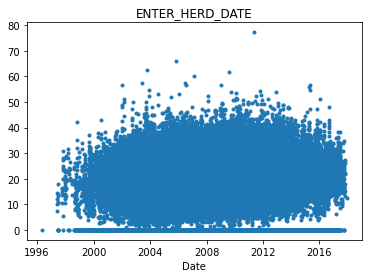

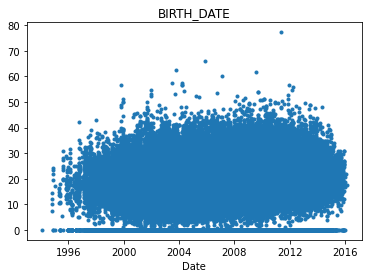

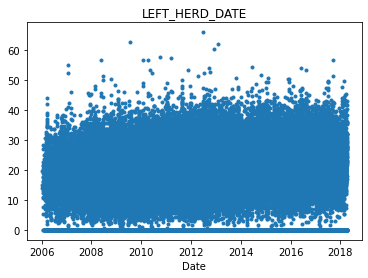

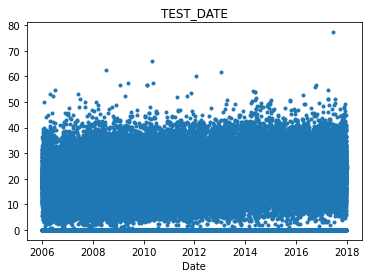

In [22]:
for i in cols_date:
    plt.xlabel('Date')
# plt.ylabel('Nombre de passagers aériens')
    plt.plot(data_final[i], data_final['DAILY_MILK_VALUE'], '.')
    plt.title(i)
    plt.show()

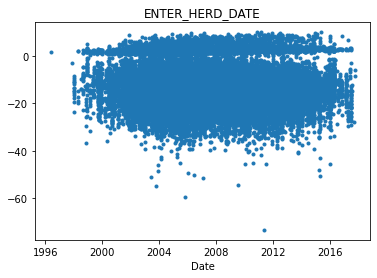

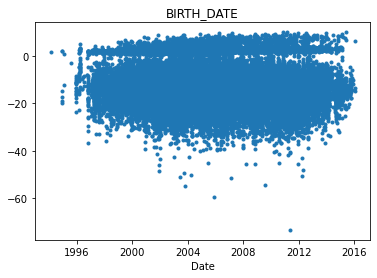

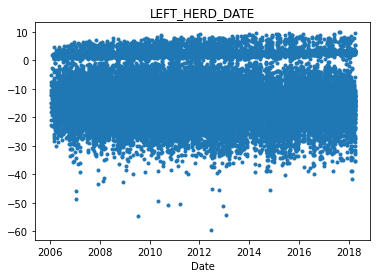

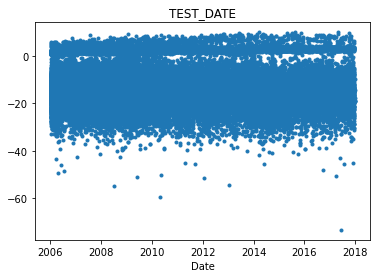

In [23]:
# Profit
for i in cols_date:
    plt.xlabel('Date')
# plt.ylabel('Nombre de passagers aériens')
    plt.plot(data_final[i], data_final.DAILY_FEED_COST - data_final.DAILY_MILK_VALUE, '.')
    plt.title(i)
    plt.show()

### Statistics

In [24]:
## Data Description (analyse descriptive)
data_final.describe(include='all')

,HRD_ID,HRD_PRV_CD,ANM_ID,ENTER_HERD_DATE,COMPTR_NO,REGION,BIRTH_DATE,LEFT_HERD_DATE,LHR_CD,LHR_CD_2,...,HL,MSP,MT,DF,CA,DCA,BCS,MR,THURL_PLACE,MDR
count,168837.000000,168837.0,168837.000000,168837,168837.000000,168837.000000,168837,148918,148918.000000,8044.000000,...,168837.000000,168837.000000,168837.000000,168837.000000,168837.000000,168837.000000,168837.000000,167688.000000,168837.000000,168837.000000
unique,NaN,NaN,NaN,3935,NaN,NaN,3925,2877,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2005-11-01 00:00:00,NaN,NaN,2004-03-02 00:00:00,2012-06-20 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,323,309,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1996-05-12 00:00:00,NaN,NaN,1994-02-09 00:00:00,2006-01-02 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-01 00:00:00,NaN,NaN,2016-02-13 00:00:00,2018-04-02 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3379.340068,4.0,6977.998093,NaN,660.317928,10.549974,NaN,NaN,15.490606,15.966683,...,98.782885,99.351031,99.369676,100.680420,98.303660,99.143482,101.160907,98.926071,-0.160385,97.791337
std,1983.447144,0.0,4050.936731,NaN,459.899031,6.119281,NaN,NaN,8.009345,8.789716,...,2.685037,2.998152,2.803614,2.658115,3.436914,2.587523,2.699929,2.647815,2.861071,2.803100
min,2.000000,4.0,1.000000,NaN,1.000000,1.000000,NaN,NaN,1.000000,2.000000,...,89.000000,87.000000,86.000000,91.000000,81.000000,88.000000,90.000000,88.000000,-12.000000,85.000000
25%,1653.000000,4.0,3443.000000,NaN,402.000000,4.000000,NaN,NaN,8.000000,8.000000,...,97.000000,98.000000,98.000000,99.000000,96.000000,97.000000,99.000000,97.000000,-2.000000,96.000000


In [25]:
data_isna = data_final.isna().sum()
print(len(data_isna[np.where(data_isna>0)[0]]))
print(data_isna[np.where(data_isna>0)[0]])

25
LEFT_HERD_DATE       19919
LHR_CD               19919
LHR_CD_2            160793
REG_ID                   4
ANB_CD_DAM            6057
COU_CD_DAM            6057
DAM_REG_ID            6057
ANB_CD_SIRE            114
COU_CD_SIRE            114
SIRE_REG_ID            114
DIM                      8
HR_24_MILK            5556
SCC                  33702
MUN                 101112
LACTOSE              70986
ABNRML_STATUS         5556
MILKNG_FQCY           5556
DAILY_MILK_VALUE      6124
CUMUL_MILK_VALUE     28815
DAILY_FEED_COST     103437
CUMUL_FEED_COST     104569
BHB                 145246
HR_24_FT              5834
HR_24_PT              5834
MR                    1149
dtype: int64


In [26]:
print(data_isna[np.where(data_isna > int(data_final.shape[0]/3))[0]])

LHR_CD_2           160793
MUN                101112
LACTOSE             70986
DAILY_FEED_COST    103437
CUMUL_FEED_COST    104569
BHB                145246
dtype: int64


In [27]:
print(data_isna[np.where(data_isna > int(data_final.shape[0]/2))[0]].index)
print(data_isna[np.where(data_isna > int(data_final.shape[0]/2))[0]])

Index(['LHR_CD_2', 'MUN', 'DAILY_FEED_COST', 'CUMUL_FEED_COST', 'BHB'], dtype='object')
LHR_CD_2           160793
MUN                101112
DAILY_FEED_COST    103437
CUMUL_FEED_COST    104569
BHB                145246
dtype: int64


In [28]:
# data_final = 

In [29]:
data_final = data_final.dropna(axis=0, subset=['DAILY_FEED_COST', 'CUMUL_FEED_COST'])

data_final_isna = data_final.isna().sum()
print(data_final_isna[np.where(data_final_isna > int(data_final.shape[0]/2))[0]])

LHR_CD_2    58672
BHB         54542
dtype: int64


In [30]:
data_final.shape

(62171, 81)

In [31]:
# data_final.loc[np.where(data_final.groupby('BIRTH_DATE').count()>1)[0], ['HRD_ID', 'ANM_ID', 'END_DATE', 'START_DATE', 'BIRTH_DATE']]

In [32]:
# data_final.iloc[:10, :20]

In [33]:
# data_final.iloc[:10, 20:40]

In [34]:
# data_final.iloc[:10, 40:60]

In [35]:
# data_final.iloc[:10, 60:80]

In [36]:
# data_final.iloc[:10, 80:]

### Duplicate

In [37]:
def get_index_real_dup(df):
    '''takes a sorted table and yields the index of the real duplicates (difference smaller than 0.5 in their MaB)'''
    
    #Getting the table without the last one 
    tmp=pd.DataFrame(df.MaB[:-1])
    
    #Adding the next MaB and the ANM_ID related
    tmp["MaBnext"]=df.MaB[1:].reset_index(drop=True)
    tmp["ANM_ID"]=df.ANM_ID[:-1]
    tmp["ANM_ID_next"]=df.ANM_ID[1:].reset_index(drop=True)
    
    #If the two lines have the same ANM_ID we check if their MaB have less than 0.5 Month
    tmp["is_near_same"]=(tmp.ANM_ID==tmp.ANM_ID_next) & (abs(tmp.MaBnext-tmp.MaB)<0.5)
    
    #Get the index of the "real_duplicates"
    first_double_MaB_index=tmp[tmp.is_near_same].index
    print("found",len(first_double_MaB_index),"real duplicates")
    
    return first_double_MaB_index

In [38]:
def eliminate_real_dup(df):
    '''takes a dataframe and yields the dataframe without any real duplicates (difference smaller than 0.5 in their MaB)'''
    
    #Get a counter and sort the dataframe to use get_index_real_dup
    counter=1
    df=df.sort_values(["ANM_ID","MaB"]).reset_index(drop=True)
    
    first_double_MaB_index=get_index_real_dup(df)

    #Until there are duplicates
    while len(first_double_MaB_index)>0:
        
        second_double_MaB_index=first_double_MaB_index+1
        
        #Combine the two lines of the real_duplicates to avoiding loosing information
        #Don't forget to drop the index if you want to combine the two df
        first_double_MaB_df=df.loc[first_double_MaB_index,].reset_index(drop=True) 
        second_double_MaB_df=df.loc[second_double_MaB_index,].reset_index(drop=True)
        combination=first_double_MaB_df.combine_first(second_double_MaB_df)
        
        #Drop the duplicates and append the combination of the two
        to_drop=list(first_double_MaB_index)+list(second_double_MaB_index)
        df=df.drop(to_drop)
        df=df.append(combination)
        
        print("After pass n'",counter,", shape is :",df.shape)
        counter+=1
        
        #Don't forget to sort and reset the index of the dataframe before rerunning get_index_real_dup
        df=df.sort_values(["ANM_ID","MaB"]).reset_index(drop=True)
        first_double_MaB_index=get_index_real_dup(df)
        
    print("\nAfter eliminating real duplicates :", df.shape)
    print(len(df.ANM_ID.unique()),"cows left.\n")
    
    return df

In [39]:
# 
data_final = eliminate_real_dup(data_final)

found 1431 real duplicates
After pass n' 1 , shape is : (60740, 81)
found 0 real duplicates

After eliminating real duplicates : (60740, 81)
2978 cows left.



In [40]:
print(data_final.shape)

(60740, 81)


In [41]:
# Adding "cumul_profit" attribut
def Cost_interpolation(df , prof_cols=["cumul_profit"] , prod_cols=["CUMUL_MILK_VALUE"] ,
                       cost_cols=["CUMUL_FEED_COST"] , group_col="HRD_ID"):
    '''Interpolating Costs using Hrd mean cost (if not available use the overall mean)'''
    
    #Check if the columns for profit cost and production are well defined
    if len(prof_cols)!=len(prod_cols) or len(prof_cols)!=len(cost_cols):
        print("There is something wrong with the profit columns, I changed nothing.")
        return df
    
    #For every cost impute the NaN using hrd mean cost
    for cost in cost_cols:
        df[cost] = df.groupby(group_col)[cost].transform(lambda x: x.fillna(x.mean()))
        mean_cost= df[cost].mean()
        
### THIS HAS TO BE REFINED WHEN WE WILL HAVE HRD SIMILARITIES
        df[cost] = df[cost].fillna(mean_cost)
        print("Mean",cost,"=",mean_cost)
### This has to be refined to replace prod by zero using other variables    
    
    #Compute the profit for each column
    for prof_col,prod_col,cost_col in zip(prof_cols,prod_cols,cost_cols):
        df[prof_col]=df[prod_col]-df[cost_col]

    print("\nAfter adding the new variables :",df.shape)
    print(df['ANM_ID'].nunique(),"cows left.\n")
    
    return df

In [42]:
# profit
data_final = Cost_interpolation(df=data_final, prof_cols=["profit"] , prod_cols=["DAILY_MILK_VALUE"] ,
                       cost_cols=["DAILY_FEED_COST"] )
# Cumul_profit
data_final = Cost_interpolation(data_final)

Mean DAILY_FEED_COST = 4.7771661178795215

After adding the new variables : (60740, 82)
2978 cows left.

Mean CUMUL_FEED_COST = 1064.3667270332564

After adding the new variables : (60740, 83)
2978 cows left.



In [43]:
data_final.shape

(60740, 83)

### More Cleaning the dataset

In [44]:
# We drop MaB

In [45]:
#Re-ordering the columns
data_final = data_final.drop(["MaB"], 1)

print("After selecting the useful columns :", data_final.shape)
print(data_final.ANM_ID.nunique(),"cows left.\n")

data_final.head()

After selecting the useful columns : (60740, 82)
2978 cows left.



,HRD_ID,HRD_PRV_CD,ANM_ID,ENTER_HERD_DATE,COMPTR_NO,REGION,BIRTH_DATE,LEFT_HERD_DATE,LHR_CD,LHR_CD_2,...,MT,DF,CA,DCA,BCS,MR,THURL_PLACE,MDR,profit,cumul_profit
0,1687,4,1,2007-03-09,508.0,12,2007-03-09,2014-12-15,14.0,NaN,...,103.0,104.0,105.0,100.0,100.0,99.0,2.0,98.0,14.13,523.0
1,1687,4,1,2007-03-09,508.0,12,2007-03-09,2014-12-15,14.0,NaN,...,103.0,104.0,105.0,100.0,100.0,99.0,2.0,98.0,15.17,843.0
2,1687,4,1,2007-03-09,508.0,12,2007-03-09,2014-12-15,14.0,NaN,...,103.0,104.0,105.0,100.0,100.0,99.0,2.0,98.0,16.12,1296.0
3,1687,4,1,2007-03-09,508.0,12,2007-03-09,2014-12-15,14.0,NaN,...,103.0,104.0,105.0,100.0,100.0,99.0,2.0,98.0,19.86,1918.0
4,1687,4,1,2007-03-09,508.0,12,2007-03-09,2014-12-15,14.0,NaN,...,103.0,104.0,105.0,100.0,100.0,99.0,2.0,98.0,15.34,2417.0


In [46]:
# Drop
to_drop = data_isna[np.where(data_isna > int(data_final.shape[0]/2))[0]].index
data_isna = data_final.isna().sum()
# df2 = data_final.drop(to_drop, 1)
# print('shape: ', df2.shape)
print(data_isna[np.where(data_isna > int(data_final.shape[0]/2))[0]])

LHR_CD_2    57241
BHB         53392
dtype: int64


### Imputation Data Missing

#### Numerical Columns

In [47]:
# To get the 'object' features
list_cols_numeric = []
for col in data_final.columns:
    if data_final[col].dtypes !='object':
        if col in cols_date:
            continue
        else:
            list_cols_numeric.append(col)
print(list_cols_numeric)
print( len(list_cols_numeric))

['HRD_ID', 'HRD_PRV_CD', 'ANM_ID', 'COMPTR_NO', 'REGION', 'LHR_CD', 'LHR_CD_2', 'REG_ID', 'DAM_REG_ID', 'SIRE_REG_ID', 'LACT_NO', 'MILKNG_PTRN', 'ANS_CD', 'DIM', 'HR_24_MILK', 'SCC', 'MUN', 'LACTOSE', 'ABNRML_STATUS', 'MILKNG_FQCY', 'DAILY_MILK_VALUE', 'CUMUL_MILK_VALUE', 'DAILY_FEED_COST', 'CUMUL_FEED_COST', 'BHB', 'HR_24_FT', 'HR_24_PT', 'CCD', 'MaBint', 'INBREEDING', 'RVALUE', 'EBV_MILK', 'EBV_FAT', 'EBV_PROT', 'EBV_FAT_PERCENT', 'EBV_PROT_PERCENT', 'SCS', 'RUMP_ANGLE', 'PIN_WIDTH', 'LOIN_STRENGTH', 'UDDER_DEPTH', 'UDDER_TEXTURE', 'MEDIAN_SUSP', 'FORE_ATTACH', 'FORE_TEAT_PLACE', 'REAR_ATTACH_HEIGHT', 'REAR_ATTACH_WIDTH', 'REAR_TEAT_PLACE', 'TEAT_LENGTH', 'FOOT_ANGLE', 'HEEL_DEPTH', 'BONE_QUALITY', 'REAR_LEG_SIDE_VIEW', 'REAR_LEG_REAR_VIEW', 'STATURE', 'HEIGHT_AT_FRONT_END', 'CHEST_WIDTH', 'BODY_DEPTH', 'ANGULARITY', 'LP', 'HL', 'MSP', 'MT', 'DF', 'CA', 'DCA', 'BCS', 'MR', 'THURL_PLACE', 'MDR', 'profit', 'cumul_profit']
72


In [48]:
# I choose mode because all variables here are "really" integer.
# cols_mode = ['LHR_CD'] #[elt for elt in cols_isnan if elt in list_cols_numeric]
# if len(cols_mode)>0:
#     for col in cols_mode:
#         #if col != 'HRD_ID' and col!= 'REG_ID':
#             #print(pd.unique(df2[col]))
#             #print(col)
#             df2[col] = df2[col].fillna(value= df2[col].mode().iloc[0])

data_final['LHR_CD_2'] = data_final['LHR_CD_2'].fillna(value= data_final['LHR_CD_2'].mode().iloc[0])
data_final['BHB'] = data_final['BHB'].fillna(value= data_final['BHB'].mode().iloc[0])

In [49]:
data_final.shape

(60740, 82)

In [50]:
# categorical
cols_isnan_cat = (data_final.isna().sum())[ np.where(data_final.isna().sum() > 0)[0] ]

In [51]:
data_final[ cols_isnan_cat.index ].isna().sum()

LEFT_HERD_DATE       4502
LHR_CD               4502
ANB_CD_DAM           2495
COU_CD_DAM           2495
DAM_REG_ID           2495
ANB_CD_SIRE            81
COU_CD_SIRE            81
SIRE_REG_ID            81
HR_24_MILK              1
SCC                  9857
MUN                 29611
LACTOSE             20008
ABNRML_STATUS           1
MILKNG_FQCY             1
DAILY_MILK_VALUE      198
CUMUL_MILK_VALUE     8029
HR_24_FT               73
HR_24_PT               73
MR                    528
profit                198
cumul_profit         8029
dtype: int64

In [52]:
cols_isnan_cat = [elt for elt in cols_isnan_cat.index if elt not in cols_date]
cols_isnan_cat

['LHR_CD',
 'ANB_CD_DAM',
 'COU_CD_DAM',
 'DAM_REG_ID',
 'ANB_CD_SIRE',
 'COU_CD_SIRE',
 'SIRE_REG_ID',
 'HR_24_MILK',
 'SCC',
 'MUN',
 'LACTOSE',
 'ABNRML_STATUS',
 'MILKNG_FQCY',
 'DAILY_MILK_VALUE',
 'CUMUL_MILK_VALUE',
 'HR_24_FT',
 'HR_24_PT',
 'MR',
 'profit',
 'cumul_profit']

In [53]:
for col in cols_isnan_cat:
    #print(col)
    data_final[col] = data_final[col].fillna(value= data_final[col].mode().iloc[0])

In [54]:
print(data_final.shape)

(60740, 82)


In [55]:
(data_final.isna().sum())[ np.where(data_final.isna().sum() > 0)[0] ]

LEFT_HERD_DATE    4502
dtype: int64

## Handling Categorical Data

In [56]:
# features.ville = pd.Categorical(features.ville)
# features.ville = features.ville.cat.codes
# data_month.CLVNG_EASE_2
# cols_temp = cols_date
# cols_temp.append('SEX_CD')
# print(cols_temp)

In [57]:
# To get the 'object' features
list_cols_object = []
for col in data_final.columns:
    if data_final[col].dtypes =='object':
        list_cols_object.append(col)
print(list_cols_object)
print( len(list_cols_object))

['ANB_CD', 'COU_CD', 'ANB_CD_DAM', 'COU_CD_DAM', 'ANB_CD_SIRE', 'COU_CD_SIRE']
6


In [58]:
cols_categorical = [elt for elt in list_cols_object if elt not in cols_date]
cols_categorical

['ANB_CD', 'COU_CD', 'ANB_CD_DAM', 'COU_CD_DAM', 'ANB_CD_SIRE', 'COU_CD_SIRE']

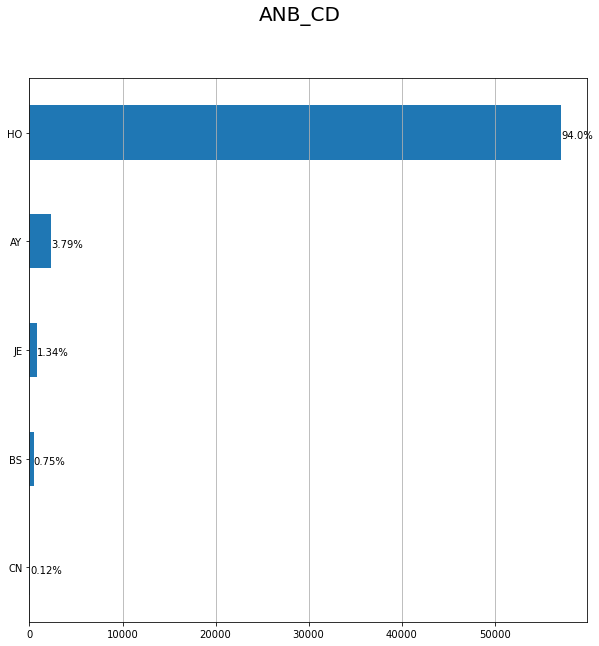

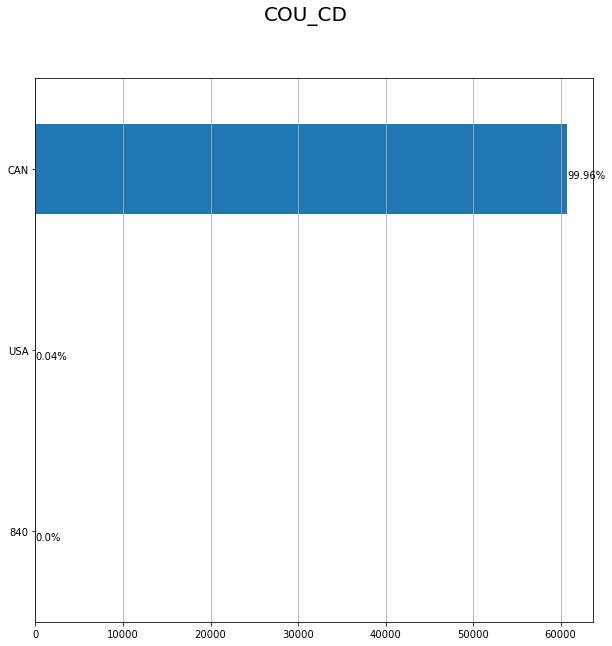

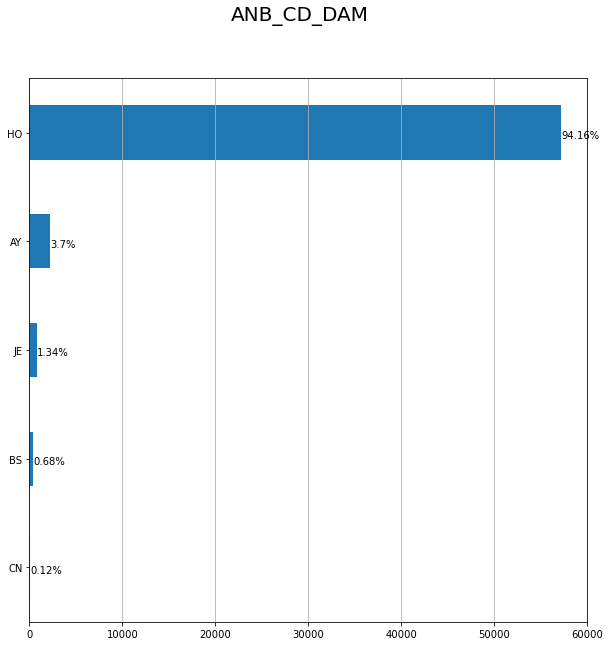

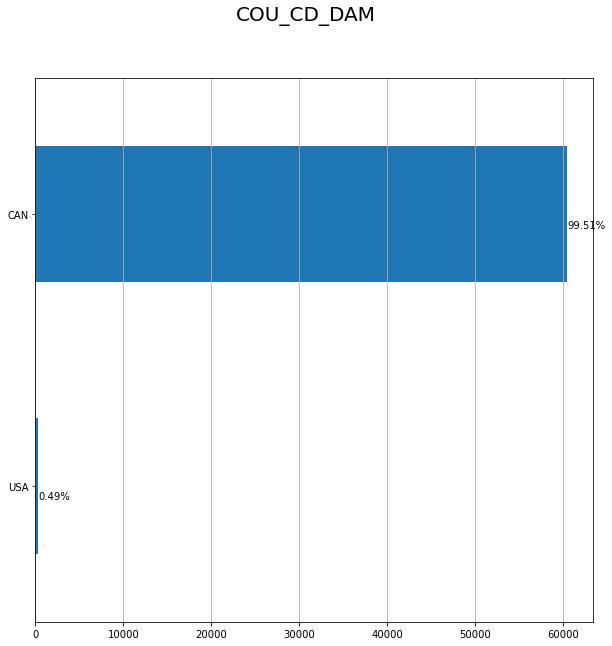

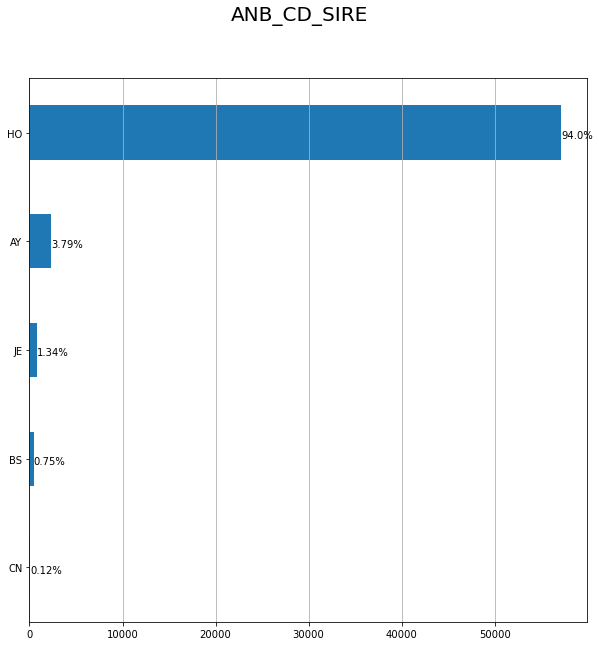

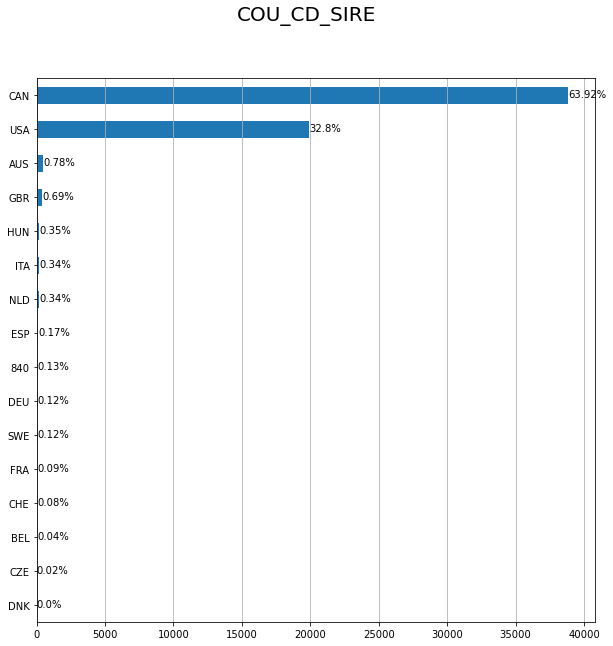

In [59]:
for col in cols_categorical:
    y = col
    plt.figure(figsize=(10,10))
    ax = data_final[y].value_counts().sort_values().plot(kind="barh")
    totals= []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    for i in ax.patches:
         ax.text(i.get_width()+.3, i.get_y()+.20, 
         str(round((i.get_width()/total)*100, 2))+'%', 
         fontsize=10, color='black')
    ax.grid(axis="x")
    plt.suptitle(y, fontsize=20)
    plt.show()

In [ ]:

for col in cols_categorical:
    y = col
    plt.figure(figsize=(10,10))
    ax = data_final[y].value_counts().sort_values().plot(kind="barh")
    totals= []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    for i in ax.patches:
         ax.text(i.get_width()+.3, i.get_y()+.20, 
         str(round((i.get_width()/total)*100, 2))+'%', 
         fontsize=10, color='black')
    ax.grid(axis="x")
    plt.suptitle(y, fontsize=20)
    plt.show()

In [60]:
#d = data_final.copy()
for c in cols_categorical:
    data_final[c] = pd.Categorical(data_final[c])
    data_final[c] = data_final[c].cat.codes
data_final[cols_categorical]

,ANB_CD,COU_CD,ANB_CD_DAM,COU_CD_DAM,ANB_CD_SIRE,COU_CD_SIRE
0,0,1,0,0,0,3
1,0,1,0,0,0,3
2,0,1,0,0,0,3
3,0,1,0,0,0,3
4,0,1,0,0,0,3
...,...,...,...,...,...,...
60735,3,1,3,0,3,15
60736,3,1,3,0,3,15
60737,3,1,3,0,3,15
60738,3,1,3,0,3,15


In [61]:
data_final.shape

(60740, 82)

### Saving

In [63]:
data_final.to_csv('data_final_test_genothidx_preprocessed.csv') 